In [1]:
import os
import pydicom
import pandas as pd
import pylab

In [2]:
data_dir = os.path.expanduser("~/.kaggle/competitions/rsna-pneumonia-detection-challenge")
image_dir = os.path.join(data_dir, "stage_1_train_images")
data_dir

'/home/roman/.kaggle/competitions/rsna-pneumonia-detection-challenge'

In [3]:
!ls /home/roman/.kaggle/competitions/rsna-pneumonia-detection-challenge

GCP%20Credits%20Request%20Link%20-%20RSNA.txt  stage_1_test_images.zip
stage_1_detailed_class_info.csv		       stage_1_train_images
stage_1_detailed_class_info.csv.zip	       stage_1_train_images.zip
stage_1_sample_submission.csv		       stage_1_train_labels.csv
stage_1_test_images			       stage_1_train_labels.csv.zip


In [4]:
class_info = pd.read_csv(os.path.join(data_dir, "stage_1_detailed_class_info.csv"))
class_info.describe()

,patientId,class
count,28989,28989
unique,25684,3
top,1bf08f3b-a273-4f51-bafa-b55ada2c23b5,No Lung Opacity / Not Normal
freq,4,11500


In [5]:
class_info['class'].value_counts()

No Lung Opacity / Not Normal    11500
Lung Opacity                     8964
Normal                           8525
Name: class, dtype: int64

In [6]:
patient_id = class_info['patientId'][0]
patient_id

'0004cfab-14fd-4e49-80ba-63a80b6bddd6'

In [15]:
pat_class = class_info['class'][0]
pat_class

'No Lung Opacity / Not Normal'

In [16]:
def get_patient(image_dir, patient_id, plot=None):
    fname = "{}.dcm".format(patient_id)
    ds = pydicom.dcmread(os.path.join(image_dir, fname))
    if plot:
        pylab.imshow(ds.pixel_array, cmap=pylab.cm.gist_gray)
        pylab.axis('off')
    return ds

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time                          TM: '000000.00'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'CR'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 103e) Series Description                  LO: 'view: PA'
(0010, 0010) Patient's Name                      PN: '0004cfab-14fd-4e49-80ba-63a80b6bddd6'
(0010, 0020) Patient ID                          LO: '0004cfab-14fd-4e49-80ba-63a80b6bddd6'
(0010, 0030) Patient's Birth Date                DA: ''
(0010, 0040) Patient's Sex                       CS: 'F'
(0010, 1010) Patient'

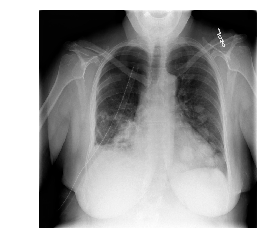

In [17]:
ds = get_patient(image_dir, patient_id, plot=True)
ds

In [13]:
im = ds.pixel_array
print(type(im))
print(im.dtype)
print(im.shape)

<class 'numpy.ndarray'>
uint8
(1024, 1024)


In [18]:
train_labels = pd.read_csv(os.path.join(data_dir, "stage_1_train_labels.csv"))
train_labels.describe()

,x,y,width,height,Target
count,8964.000000,8964.000000,8964.000000,8964.000000,28989.000000
mean,391.456158,363.135877,220.845382,334.174364,0.309221
std,203.945378,148.607149,59.041384,158.097239,0.462180
min,2.000000,2.000000,40.000000,45.000000,0.000000
25%,205.000000,246.000000,180.000000,207.000000,0.000000
50%,320.000000,360.000000,219.000000,304.000000,0.000000
75%,591.000000,475.000000,261.000000,445.000000,1.000000
max,817.000000,881.000000,528.000000,942.000000,1.000000


In [20]:
train_labels.iloc[4]

patientId    00436515-870c-4b36-a041-de91049b9ab4
x                                             264
y                                             152
width                                         213
height                                        379
Target                                          1
Name: 4, dtype: object